In [55]:
import keras
from keras.api import layers
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("C:\\Users\\Pars\\Desktop\\my computer\\program\\mochine learning\\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [56]:
DATASET1 = "C:\\Users\\Pars\\Desktop\\my computer\\program\\mochine learning\\Persian-Alphabet-Recognition\\Datasets\\DS-1"
DATASET2 = "C:\\Users\\Pars\\Desktop\\my computer\\program\\mochine learning\\Persian-Alphabet-Recognition\\Datasets\\DS-2"
REAL_DATA = "C:\\Users\\Pars\\Desktop\\my computer\\program\\mochine learning\\Persian-Alphabet-Recognition\Datasets\Real Data"

CLASSES = 43

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (2751, 64, 64)
X-Test : (688, 64, 64)
Y-Train : (2751,)
Y-Test : (688,)


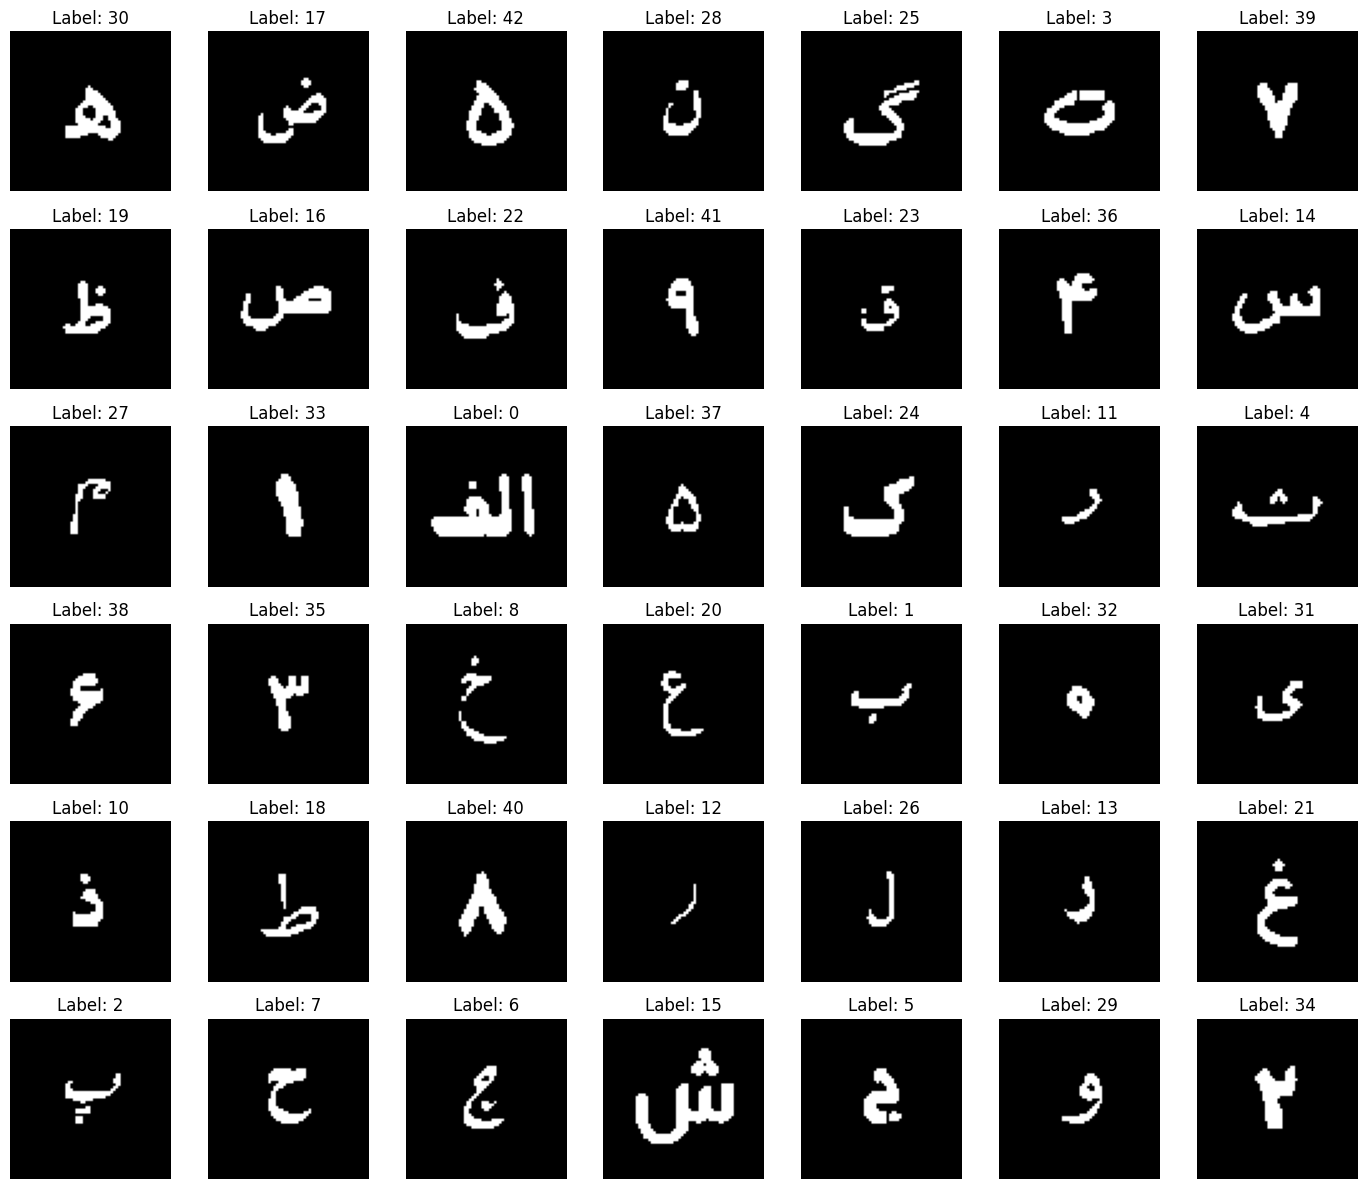

In [57]:

dataloader = DataLoader(path=DATASET1, 
                        image_size=64, 
                        shrink=10, padding=0, 
                        invert=True)

data = dataloader.load_data()
X, y = data[:2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

plt.figure(figsize=(14, 12))
unique_labels = set()
counter = 0

for i in range(len(y_train)):
    if y_train[i] not in unique_labels:
        unique_labels.add(y_train[i])
        plt.subplot(6, 7, counter + 1)
        plt.imshow(X_train[i], cmap='gray')
        plt.title(f'Label: {y_train[i]}')
        plt.axis('off')
        counter += 1
        if counter == 42:
            break

plt.tight_layout()
plt.show()

In [58]:
model_optimized = Sequential(name='Model-Optimized')

model_optimized.add(layers.Flatten(input_shape=(64, 64)))
model_optimized.add(layers.Dense(units=1024, activation='relu', name='Dense_1'))
model_optimized.add(layers.Dropout(0.3))  
model_optimized.add(layers.Dense(units=512, activation='relu', name='Dense_2'))
model_optimized.add(layers.Dropout(0.3))
model_optimized.add(layers.Dense(units=256, activation='relu', name='Dense_3'))
model_optimized.add(layers.Dropout(0.3))
model_optimized.add(layers.Dense(units=128, activation='relu', name='Dense_4'))
model_optimized.add(layers.Dense(units=CLASSES, activation='softmax', name='Dense_Output'))

model_optimized.summary()

Model: "Model-Optimized"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_Output (Dense)            │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,889,899 (18.65 MB)

 Trainable params: 4,889,899 (18.65 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model_optimized.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model_optimized.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

history_df_1 = pd.DataFrame({
    'Training_Accuracy': history.history['accuracy'],
    'Validation_Accuracy': history.history['val_accuracy'],
    'Training_Loss': history.history['loss'],
    'Validation_Loss': history.history['val_loss']
})

# model_1.save(f"C:\\Users\\Pars\\Desktop\\my computer\\program\\mochine learning\\Persian-Alphabet-Recognition\\Models\\Neural Network\\{history.history['val_accuracy'][-1]:.4f}_val_acc.keras")

display(history_df_1)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.0297 - loss: 3.7533 - val_accuracy: 0.0262 - val_loss: 3.3854
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.0816 - loss: 3.1169 - val_accuracy: 0.2558 - val_loss: 2.3408
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.3155 - loss: 2.1809 - val_accuracy: 0.4288 - val_loss: 1.6549
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - accuracy: 0.4123 - loss: 1.6484 - val_accuracy: 0.5392 - val_loss: 1.3097
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.5231 - loss: 1.3410 - val_accuracy: 0.6497 - val_loss: 1.0879
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.6129 - loss: 1.1099 - val_accuracy: 0.6831 - val_loss: 0.9297
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - accuracy: 0.6679 - loss: 0.9456 - val_accuracy: 0.7456 - val_loss: 0.7733
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.7075 - loss: 0.8274 - val_accuracy: 0.7500 - 

,Training_Accuracy,Validation_Accuracy,Training_Loss,Validation_Loss
0,0.040712,0.026163,3.708956,3.385376
1,0.129771,0.255814,2.902960,2.340766
2,0.334424,0.428779,2.034549,1.654897
3,0.448201,0.539244,1.595029,1.309731
4,0.546347,0.649709,1.295833,1.087869
5,0.625227,0.683140,1.079995,0.929727
6,0.676481,0.745640,0.922523,0.773258
7,0.713559,0.750000,0.809662,0.766567
8,0.749546,0.765988,0.701699,0.657846
9,0.767357,0.793605,0.632949,0.628581


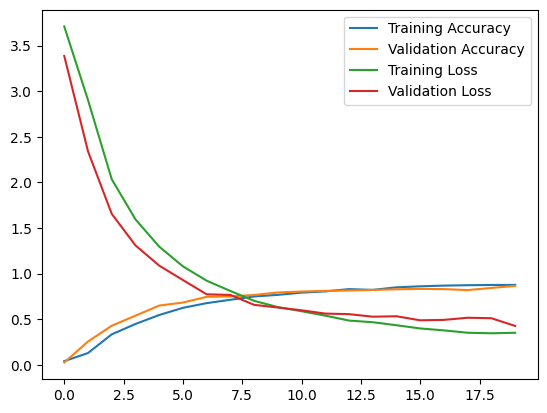

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8713 - loss: 0.4244
Model 1 Test Accuracy: 0.8663
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


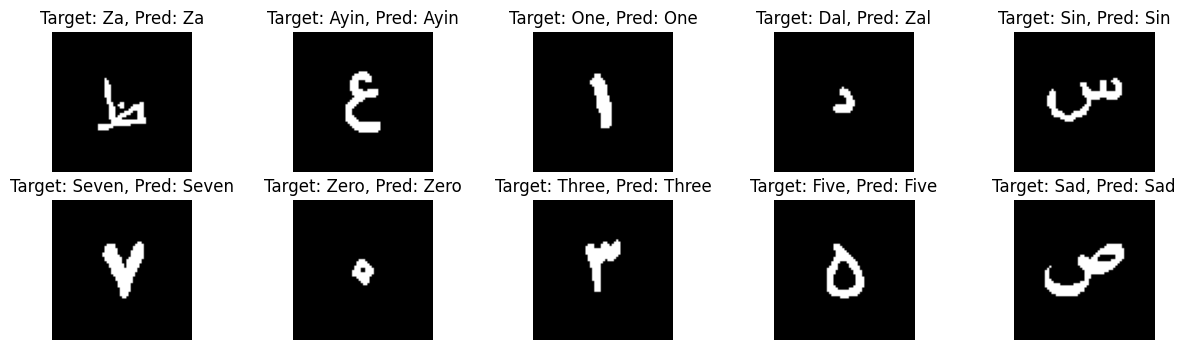

In [62]:
from keras.api.models import load_model

plt.plot(history_df_1['Training_Accuracy'], label='Training Accuracy')
plt.plot(history_df_1['Validation_Accuracy'], label='Validation Accuracy')
plt.plot(history_df_1['Training_Loss'], label='Training Loss')
plt.plot(history_df_1['Validation_Loss'], label='Validation Loss')
plt.legend()
plt.show()


test_loss_1, test_acc_1 = model_optimized.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc_1:.4f}')

predictions = model_1.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()

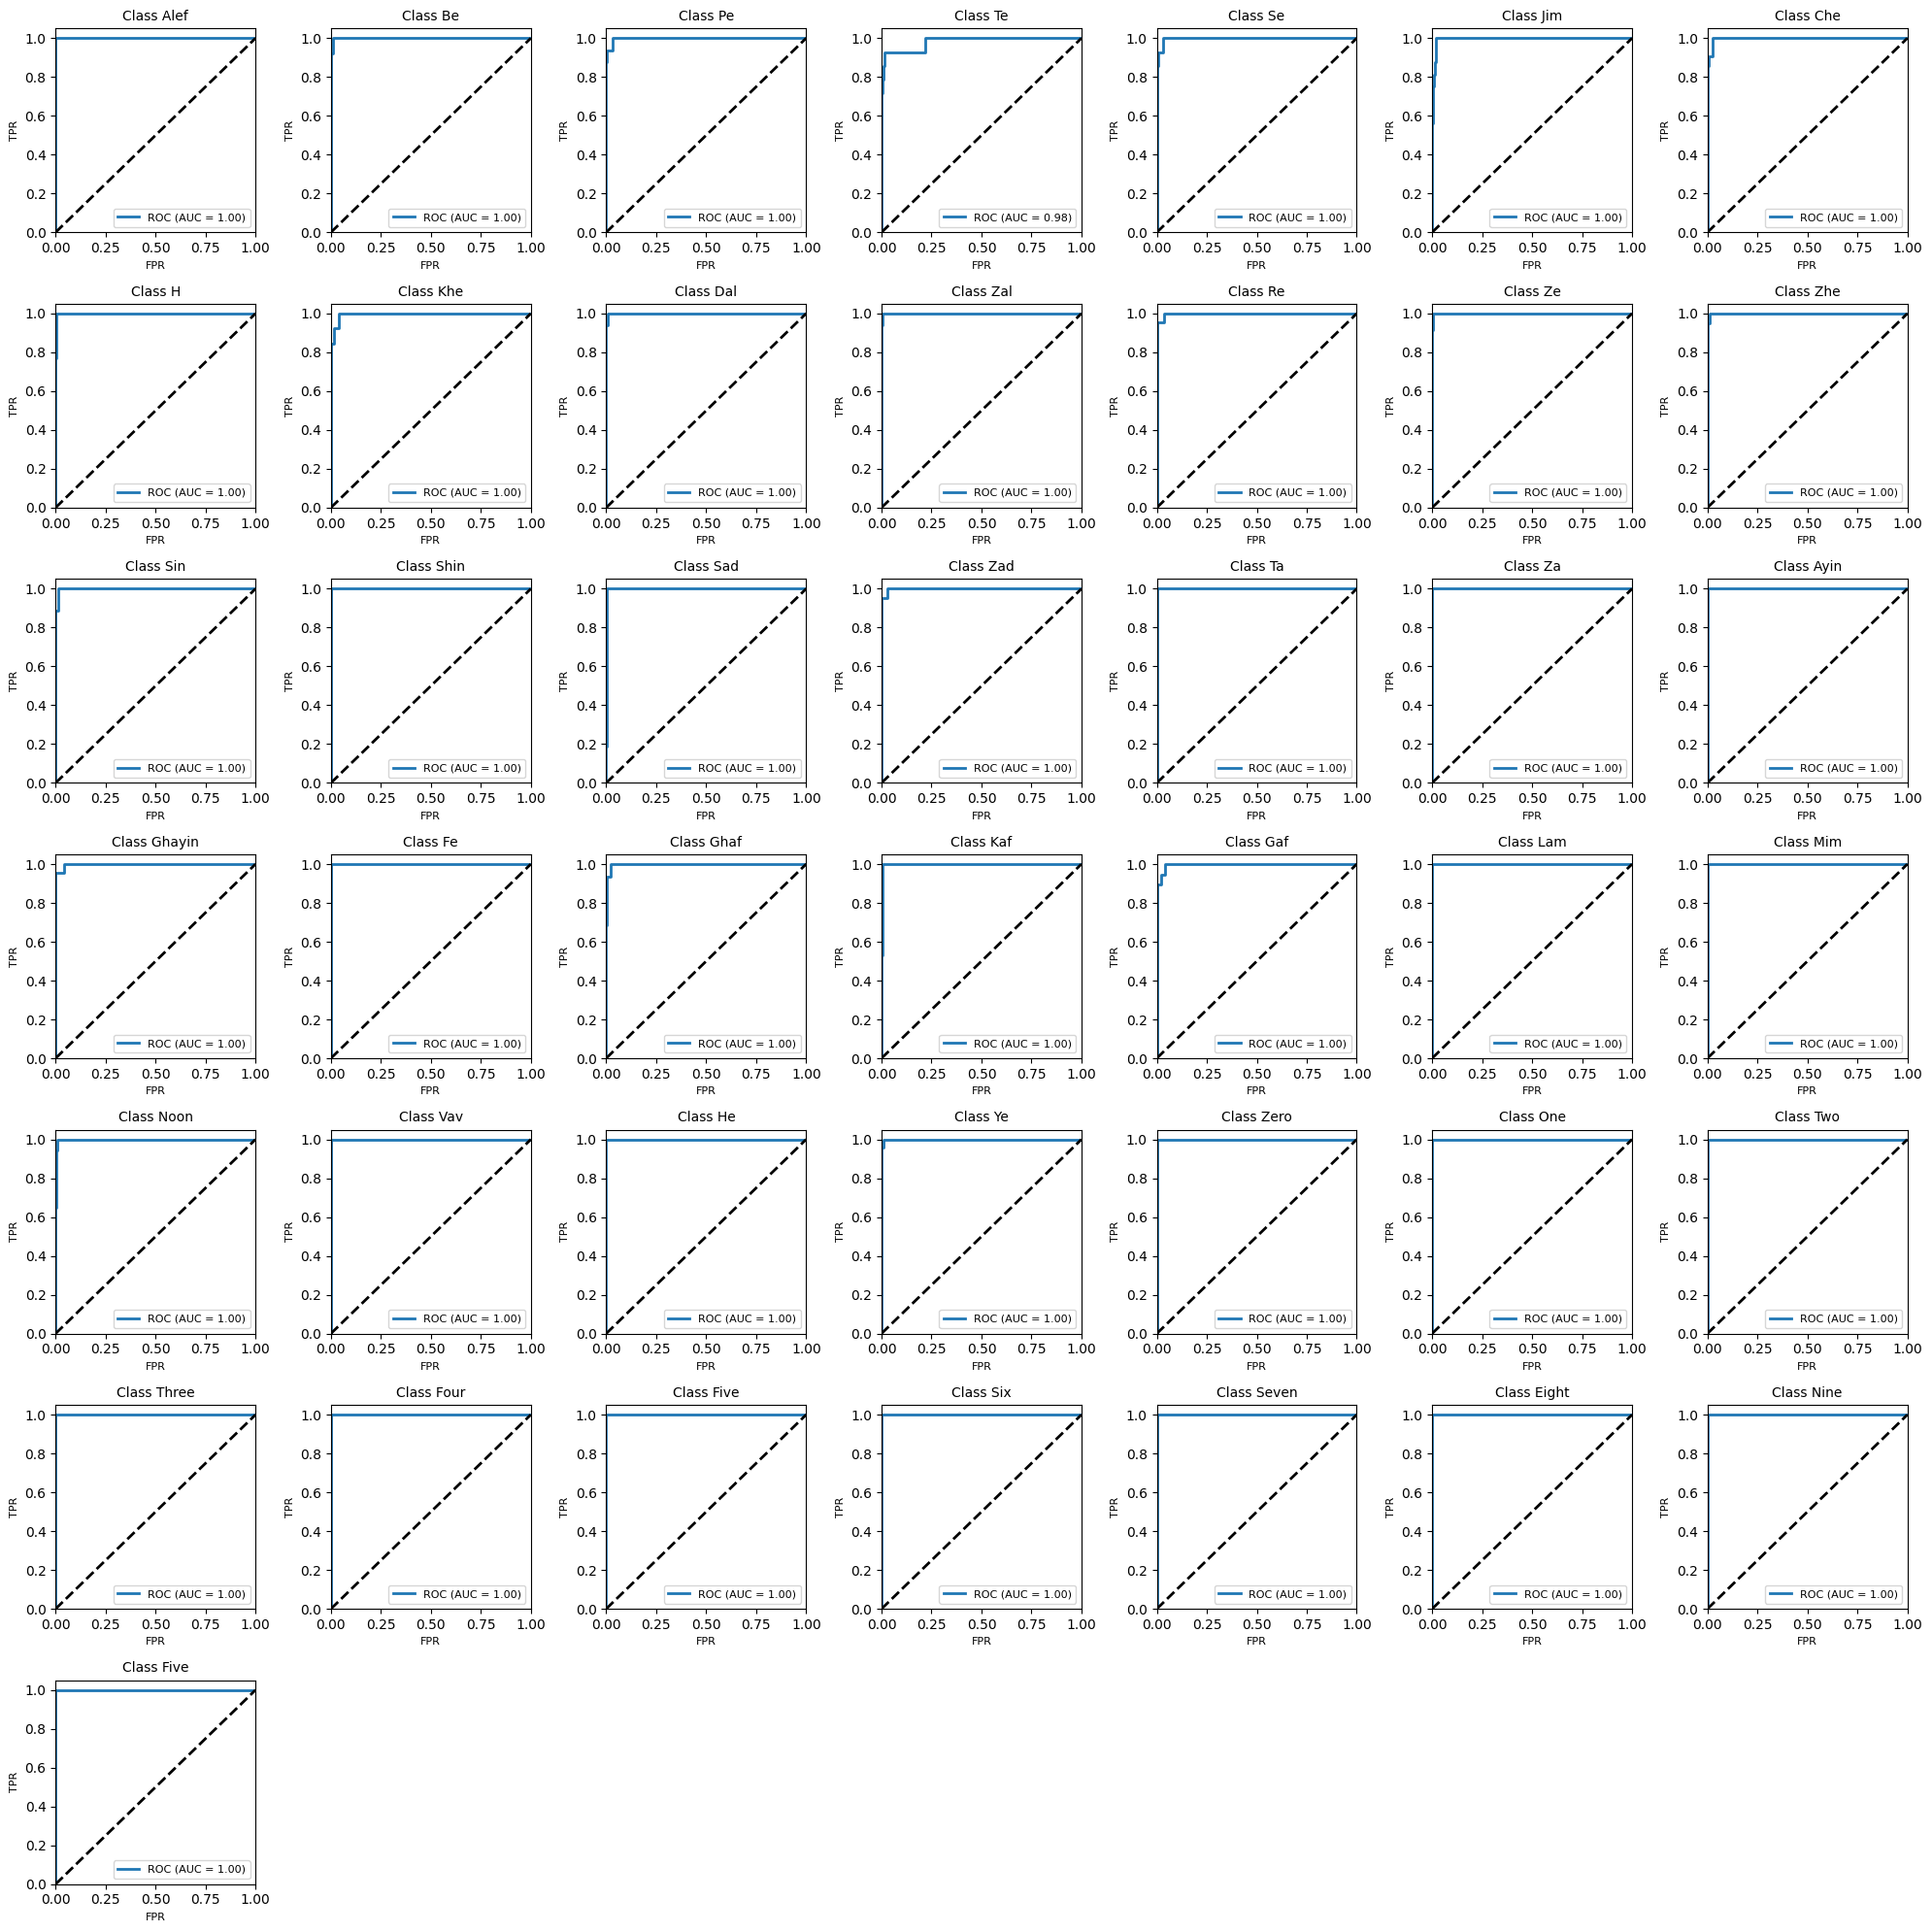

In [63]:
from keras.api.utils import to_categorical
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 7  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 20))

axes = axes.flatten()

for i in range(CLASSES):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
